In [2]:
import pandas as pd
train_data = pd.read_csv(r"C:\Users\Shrey\OneDrive\Desktop\data mining\house\train (1).csv")

In [3]:
train_data.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
print(train_data.isnull().sum())


Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [5]:


train_data['LotFrontage'].fillna(train_data['LotFrontage'].median(), inplace=True)

print(train_data.isnull().sum())

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64


In [ ]:
y = train_data['SalePrice']

In [8]:

selected_features = ['OverallQual', 'GrLivArea', 'YearBuilt', 'Neighborhood', 
                     'TotalBsmtSF', '1stFlrSF', 'GarageCars', 'GarageArea', 
                     'LotArea', 'FullBath']
train_data = train_data[selected_features]

print(train_data.head())

   OverallQual  GrLivArea  YearBuilt Neighborhood  TotalBsmtSF  1stFlrSF  \
0            7       1710       2003      CollgCr          856       856   
1            6       1262       1976      Veenker         1262      1262   
2            7       1786       2001      CollgCr          920       920   
3            7       1717       1915      Crawfor          756       961   
4            8       2198       2000      NoRidge         1145      1145   

   GarageCars  GarageArea  LotArea  FullBath  
0           2         548     8450         2  
1           2         460     9600         2  
2           2         608    11250         2  
3           3         642     9550         1  
4           3         836    14260         2  


In [21]:
print(y.head())

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64


In [ ]:
train_data = pd.get_dummies(train_data, columns=['Neighborhood'], drop_first=True)
train_data.head()


In [19]:
train_data.head()

,OverallQual,GrLivArea,YearBuilt,TotalBsmtSF,1stFlrSF,GarageCars,GarageArea,LotArea,FullBath,Neighborhood_Blueste,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,7,1710,2003,856,856,2,548,8450,2,0,...,0,0,0,0,0,0,0,0,0,0
1,6,1262,1976,1262,1262,2,460,9600,2,0,...,0,0,0,0,0,0,0,0,0,1
2,7,1786,2001,920,920,2,608,11250,2,0,...,0,0,0,0,0,0,0,0,0,0
3,7,1717,1915,756,961,3,642,9550,1,0,...,0,0,0,0,0,0,0,0,0,0
4,8,2198,2000,1145,1145,3,836,14260,2,0,...,1,0,0,0,0,0,0,0,0,0


In [22]:
from sklearn.preprocessing import StandardScaler

# Scaling numerical features
numerical_features = ['GrLivArea', 'LotArea', 'TotalBsmtSF', '1stFlrSF', 'GarageArea']

scaler = StandardScaler()
train_data[numerical_features] = scaler.fit_transform(train_data[numerical_features])

print(train_data.head())


   OverallQual  GrLivArea  YearBuilt  TotalBsmtSF  1stFlrSF  GarageCars  \
0            7   0.370333       2003    -0.459303 -0.793434           2   
1            6  -0.482512       1976     0.466465  0.257140           2   
2            7   0.515013       2001    -0.313369 -0.627826           2   
3            7   0.383659       1915    -0.687324 -0.521734           3   
4            8   1.299326       2000     0.199680 -0.045611           3   

   GarageArea   LotArea  FullBath  Neighborhood_Blueste  ...  \
0    0.351000 -0.207142         2                     0  ...   
1   -0.060731 -0.091886         2                     0  ...   
2    0.631726  0.073480         2                     0  ...   
3    0.790804 -0.096897         1                     0  ...   
4    1.698485  0.375148         2                     0  ...   

   Neighborhood_NoRidge  Neighborhood_NridgHt  Neighborhood_OldTown  \
0                     0                     0                     0   
1                     

In [23]:
from sklearn.preprocessing import StandardScaler

# Scaling numerical features
numerical_features = ['GrLivArea', 'LotArea', 'TotalBsmtSF', '1stFlrSF', 'GarageArea']

scaler = StandardScaler()
train_data[numerical_features] = scaler.fit_transform(train_data[numerical_features])

print(train_data.head())


   OverallQual  GrLivArea  YearBuilt  TotalBsmtSF  1stFlrSF  GarageCars  \
0            7   0.370333       2003    -0.459303 -0.793434           2   
1            6  -0.482512       1976     0.466465  0.257140           2   
2            7   0.515013       2001    -0.313369 -0.627826           2   
3            7   0.383659       1915    -0.687324 -0.521734           3   
4            8   1.299326       2000     0.199680 -0.045611           3   

   GarageArea   LotArea  FullBath  Neighborhood_Blueste  ...  \
0    0.351000 -0.207142         2                     0  ...   
1   -0.060731 -0.091886         2                     0  ...   
2    0.631726  0.073480         2                     0  ...   
3    0.790804 -0.096897         1                     0  ...   
4    1.698485  0.375148         2                     0  ...   

   Neighborhood_NoRidge  Neighborhood_NridgHt  Neighborhood_OldTown  \
0                     0                     0                     0   
1                     

In [24]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_data, y, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape}")
print(f"Validation set: {X_val.shape}")


Training set: (1168, 33)
Validation set: (292, 33)


In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the validation set
y_pred = model.predict(X_val)

# Evaluate the model
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

print(f"RMSE: {rmse}")
print(f"R^2 Score: {r2}")


RMSE: 36226.933283452956
R^2 Score: 0.828900276249785


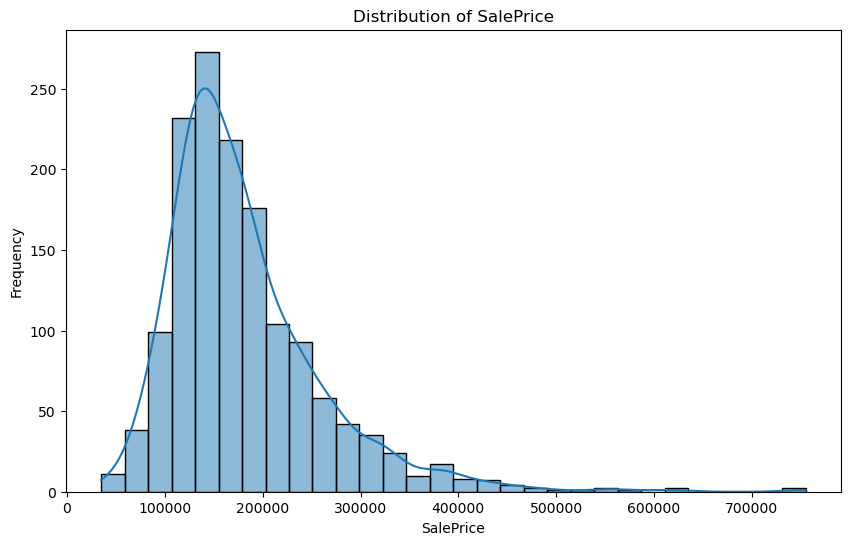

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(y, kde=True, bins=30)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()


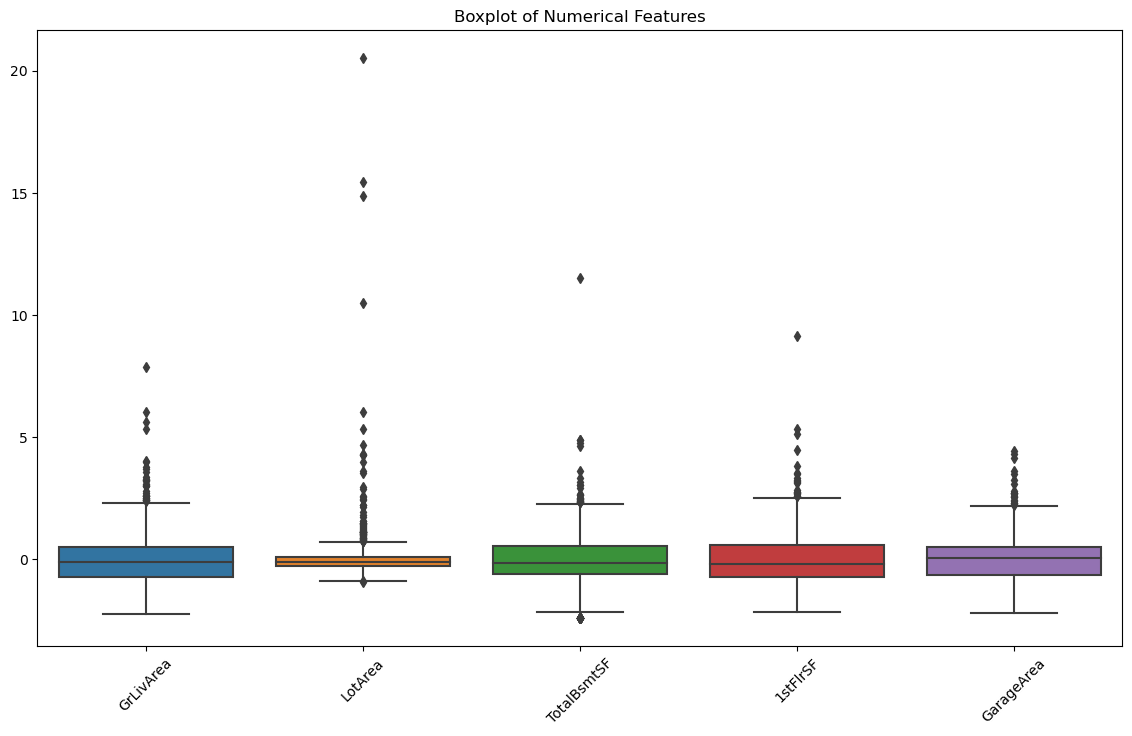

In [27]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=train_data[numerical_features])
plt.title('Boxplot of Numerical Features')
plt.xticks(rotation=45)
plt.show()


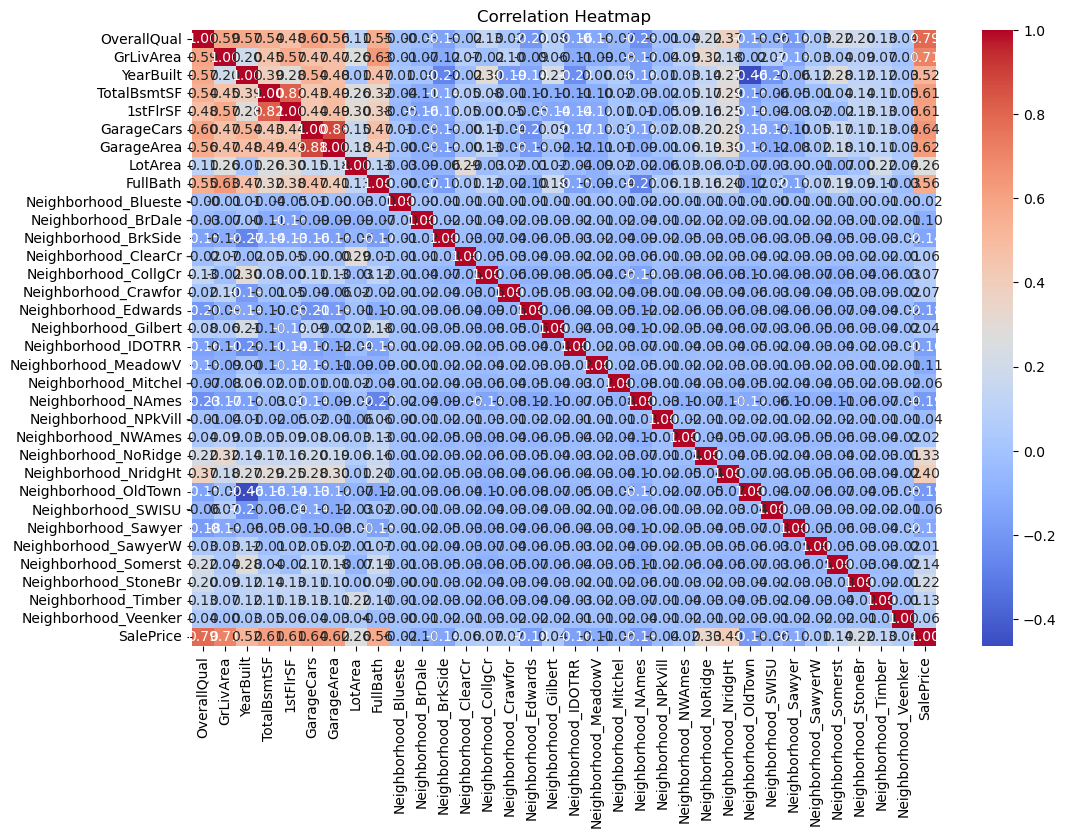

In [28]:
plt.figure(figsize=(12, 8))
correlation_matrix = train_data.join(y).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


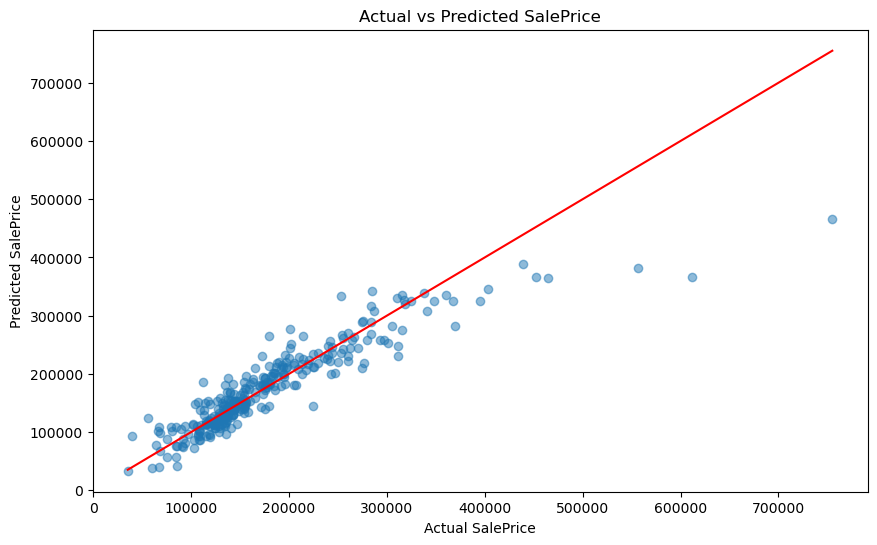

In [29]:
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred, alpha=0.5)
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice')
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red')
plt.show()


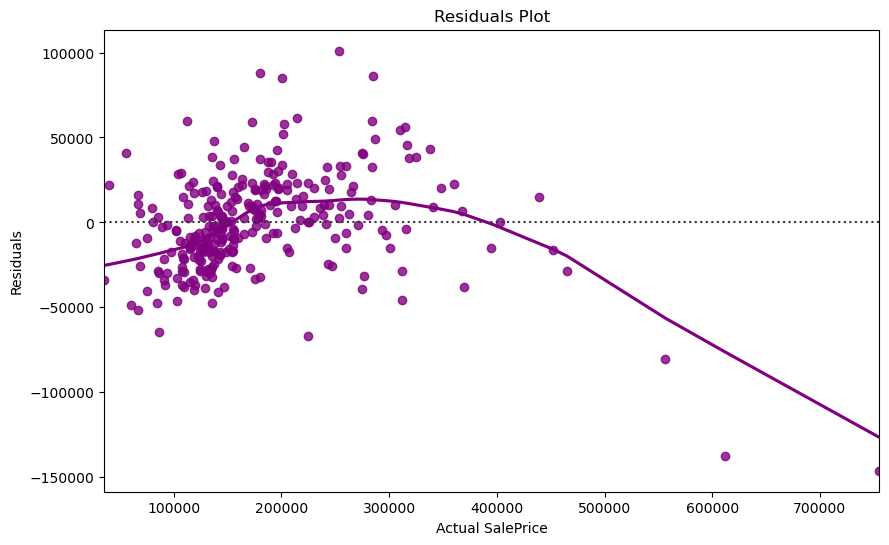

In [30]:
plt.figure(figsize=(10, 6))
sns.residplot(x=y_val, y=y_pred, lowess=True, color='purple')
plt.xlabel('Actual SalePrice')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()


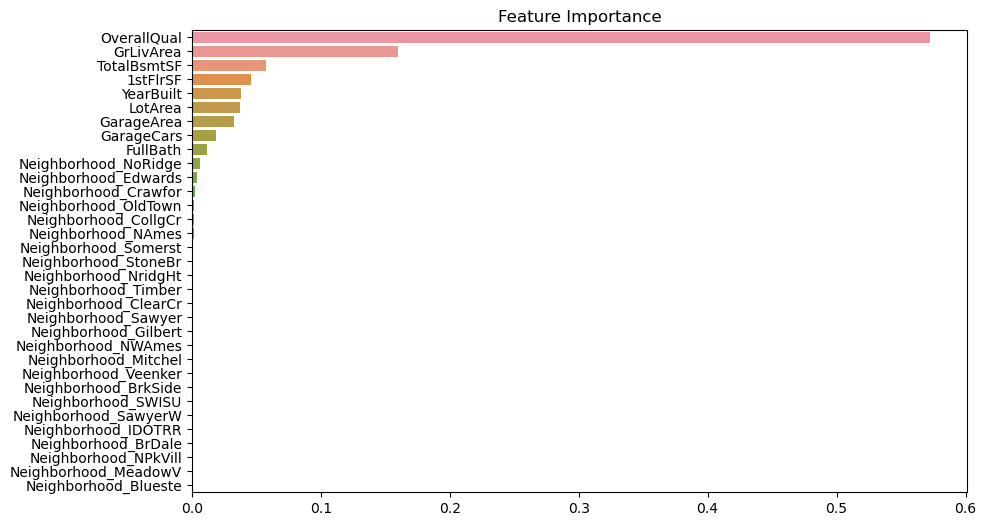

In [31]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)
feature_importances = feature_importances.sort_values(ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Feature Importance')
plt.show()
